In [2]:
import numpy as np
from numpy import sqrt, exp, abs
import matplotlib.pyplot as plt

In [3]:
m0 = 1.0
m = 0.067*m0
dx = 0.5/0.05292 # 0.5 nm
h_bar = 1.0
w = 10 # szerokość bariery (oczka)
l = 100 # odległość między barierami (oczka)

### Punkt 2 (Funkcja falowa)

In [4]:
E = 7.0/27211.6 # 7 meV
q = sqrt(2*m*E/(h_bar**2)) # wektor falowy
psi = np.zeros([3*l + 2*w], dtype='complex')
x_vec = np.arange(0.0, len(psi) * dx, dx) #j.a
psi[-1] = 1.0 # ostatni punkt siatki psi = 1
psi[-2] = exp(-1j*q*dx) # przed ostantni punkt siatki
Vb = 30.0/27211.6 # potencjał 30.0 meV w barierze, poza barierą = 0 meV
V = np.zeros(len(psi))

x1_id, x2_id = 0, 1 # indeksy dwóch sąsiednich punktów x1 i x2 po lewej stronie bariery
x1, x2 = x1_id*dx, x2_id*dx # położenie

In [5]:
for x_id in range(len(psi)): # potencjał
    if (x_id >= l - 1 and x_id < l + w - 1) or (x_id >= 2*l + w - 1 and x_id < 2*l + 2*w - 1):
        V[x_id] = Vb

In [6]:
# Całkowanie HΨ = EΨ od prawej do lewej
for x_id in range(len(psi)-3, -1, -1): # iterowanie od 3 el. od końca
    psi[x_id] = -2*m*(E - V[x_id + 1])*psi[x_id + 1]*dx**2 - psi[x_id + 2] + 2*psi[x_id + 1]

psi_sq = abs(psi)**2

In [19]:
A = ( psi[x1_id] * exp(1j*q*x1) - psi[x2_id] * exp(1j*q*x2) )/( (exp(1j*q*x1))**2 - (exp(1j*q*x2))**2 )

B = -((( -psi[x2_id] * exp(1j*q*x1) + psi[x1_id] * exp(1j*q*x2) )) * 
    ( exp(1j*q*x1 + 1j*q*x2) ))/( (exp(1j*q*x1))**2 - (exp(1j*q*x2))**2 )

R = (abs(B)**2)/(abs(A)**2) # prawd. odbicia
T = 1/(abs(A)**2) # prawd. przejścia

In [8]:
print("A: ", A)
print("B: ", B)
print("Prawd. odbicia (R): ", R)
print("Prawd. przejścia (T): ", T)

A:  (-1.5789876383743295+1.344678139911699j)
B:  (-0.20117638137443328-1.805793267700486j)
Prawd. odbicia (R):  0.7675154586962344
Prawd. przejścia (T):  0.2324845413037612


In [9]:
psi_left = [(A*exp(1j*q*x) + B*exp(-1j*q*x)) for x in x_vec[:l]]
psi_left = np.array(psi_left)
psi_left_sq = abs(psi_left)**2
psi_left_sq

array([ 3.3816111 ,  4.09884291,  4.85915841,  5.65320874,  6.47123028,
        7.30316464,  8.13878237,  8.9678087 ,  9.78004995, 10.56551879,
       11.31455712, 12.01795475, 12.66706273, 13.25389961, 13.77124967,
       14.21275157, 14.5729766 , 14.84749544, 15.0329326 , 15.12700797,
       15.12856478, 15.03758389, 14.855184  , 14.5836079 , 14.22619489,
       13.78733972, 13.27243854, 12.68782258, 12.04068026, 11.33896885,
       10.59131659,  9.8069166 ,  8.99541385,  8.16678658,  7.33122359,
        6.49899894,  5.68034567,  4.88532993,  4.12372723,  3.40490223,
        2.7376936 ,  2.13030532,  1.59020584,  1.12403622,  0.73752847,
        0.4354351 ,  0.22147064,  0.098266  ,  0.06733609,  0.12906124,
        0.28268247,  0.52631085,  0.85695074,  1.27053658,  1.76198293,
        2.32524697,  2.95340281,  3.63872665,  4.37279175,  5.14657206,
        5.95055317,  6.77484934,  7.60932504,  8.44371955,  9.26777317,
       10.07135334, 10.84457924, 11.5779433 , 12.26242807, 12.88

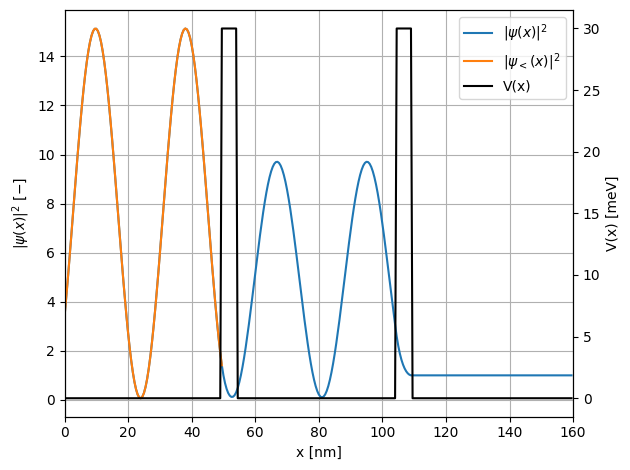

In [23]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
d1 = ax1.plot(x_vec*0.05292, psi_sq)
d2 = ax1.plot(x_vec[:l]*0.05292, psi_left_sq)
d3 = ax2.plot(x_vec*0.05292, V*27211.6, 'black')

ax1.set_xlabel('x [nm]')
ax1.set_ylabel(r'$|\psi(x)|^2 \ [-]$')
ax2.set_ylabel('V(x) [meV]')
ax1.set_xlim(0.0, (x_vec[-1] + dx)*0.05292)
ax1.grid()

d = d1+d2+d3
ax1.legend(d, [r'$|\psi(x)|^2$', r'$|\psi_<(x)|^2$', 'V(x)'], loc=1)

plt.tight_layout()
plt.show()

### Punkt 3. T(E), R(E)

In [11]:
dE = 0.5 # 0.5 meV 
E_vec = np.linspace(dE, 50.0, 1000)/27211.6 
q_vec = [sqrt(2*m*ee) for ee in E_vec]
q_vec = np.array(q_vec)
psi_vec = np.zeros([len(E_vec), 3*l + 2*w], dtype='complex')
psi_sq_vec = np.zeros([len(E_vec), 3*l + 2*w])
A_vec, B_vec = np.zeros([len(E_vec)], dtype='complex'), np.zeros([len(E_vec)], dtype='complex')
T_vec, R_vec = np.zeros(len(E_vec)), np.zeros(len(E_vec))

psi_vec[..., -1] = 1.0 # warunki końcowe
for q_id, q_val in enumerate(q_vec):
    psi_vec[q_id, -2] = exp(-1j*q_val*dx)

In [12]:
# Całkowanie HΨ = EΨ od prawej do lewej
for e_id, e_val in enumerate(E_vec):
    for x_id in range(len(psi_vec[0])-3, -1, -1): # iterowanie od 3 el. od końca
        psi_vec[e_id][x_id] = -2*m*(e_val - V[x_id + 1])*psi_vec[e_id][x_id + 1]*dx**2 - \
        psi_vec[e_id][x_id + 2] + 2*psi_vec[e_id][x_id + 1]

for e_id in range(len(E_vec)): # moduł
    psi_sq_vec[e_id] = abs(psi_vec[e_id])**2

In [13]:
for q_id, q_val in enumerate(q_vec):
    A_vec[q_id] = (psi_vec[q_id][x1_id] * exp(1j*q_val*x1) - 
                psi_vec[q_id][x2_id] * exp(1j*q_val*x2))/((exp(1j*q_val*x1))**2 - 
                (exp(1j*q_val*x2))**2)

    B_vec[q_id] = -(((-psi_vec[q_id][x2_id]*exp(1j*q_val*x1) + 
                psi_vec[q_id][x1_id]*exp(1j*q_val*x2))) * 
                (exp(1j*q_val*x1 + 1j*q_val*x2)))/((exp(1j*q_val*x1))**2 - 
                (exp(1j*q_val*x2))**2)

for e_id in range(len(E_vec)):
    R_vec[e_id] = ((abs(B_vec[e_id]))**2)/((abs(A_vec[e_id]))**2) # prawd. odbicia
    T_vec[e_id] = 1/( (abs(A_vec[e_id]))**2 ) # prawd. przejścia

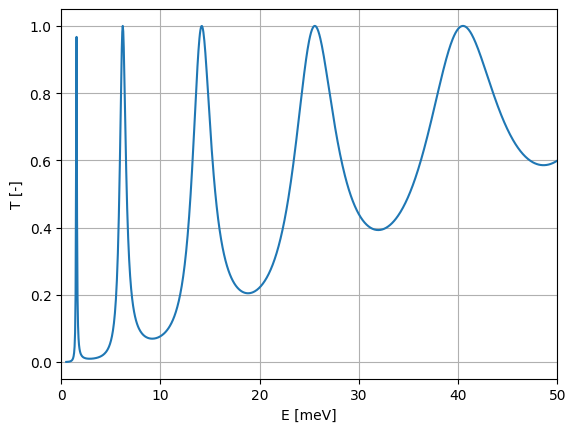

In [14]:
plt.plot(E_vec*27211.6, T_vec)
plt.grid()
plt.xlabel('E [meV]')
plt.ylabel('T [-]')
plt.xlim(0.0, 50.0)
plt.show()

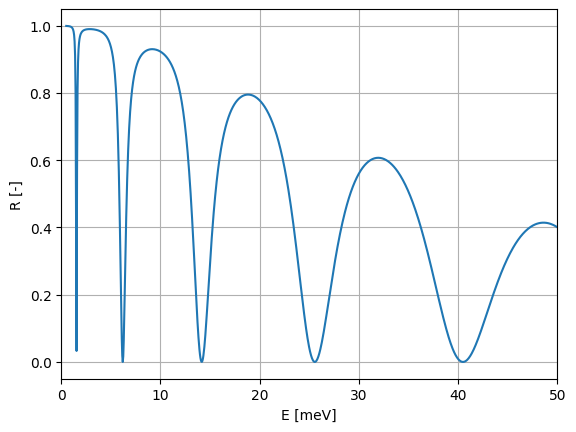

In [15]:
plt.plot(E_vec*27211.6, R_vec)
plt.grid()
plt.xlabel('E [meV]')
plt.ylabel('R [-]')
plt.xlim(0.0, 50.0)
plt.show()

### Punkt 4. Rezonanse

In [16]:
idxs = np.where(T_vec>0.9997) # indeksy gdzie T > 0.9997
idxs

(array([115, 276, 505, 506, 806, 807, 808, 809]),)

In [17]:
idxs = [115, 276, 506, 807] # tablica na indeksy dla T(E)~=1
legend = [str(round(E_vec[id]*27211.6, 3)) + ' [meV]' for id in idxs]

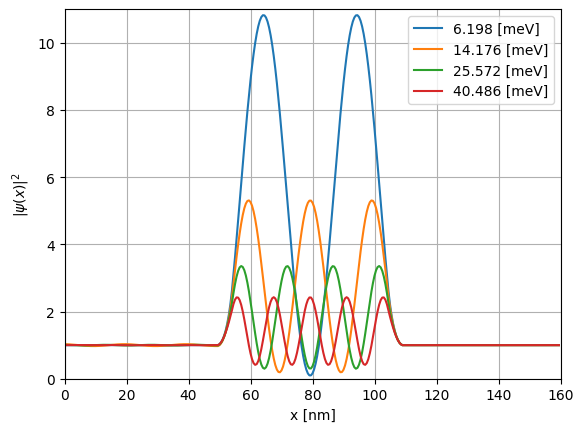

In [18]:
for id in idxs:
    plt.plot(x_vec*0.05292, psi_sq_vec[id])

plt.xlim(0.0, x_vec[-1]*0.05292)
plt.xlabel('x [nm]')
plt.ylabel(r'$|\psi(x)|^2$')
plt.grid()
plt.xlim(0.0, (x_vec[-1] + dx)*0.05292)
plt.ylim(0.0, 11.0)
plt.legend(legend)
plt.show()